In [1]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('/kaggle/input/ibm-attrition-dataset/IBM.csv')

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,1470.0,NaN,NaN,NaN,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,NaN,NaN,NaN,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MaritalStatus,1470,3,Married,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyIncome,1470.0,NaN,NaN,NaN,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [5]:
# checking for NaN values
df.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

Text(0.5, 1.0, 'Age distribution of Employees')

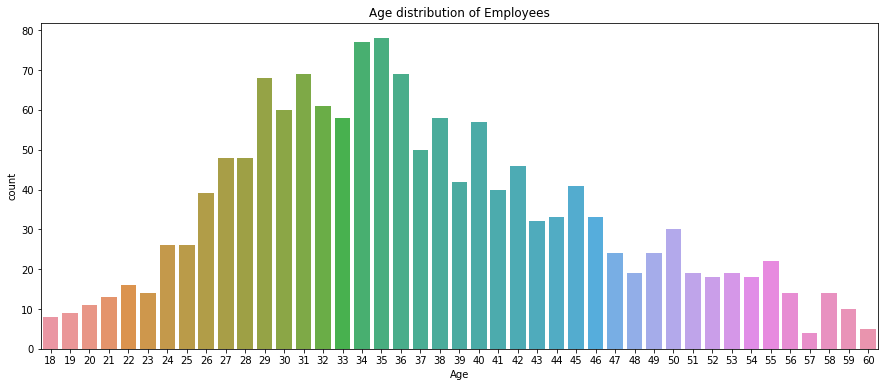

In [6]:
# Age distribution of employees
plt.figure(figsize=(15,6))
sns.countplot(data = df,x=df['Age'])
plt.title('Age distribution of Employees')

Text(0.5, 1.0, 'Age Attrition of Employees')

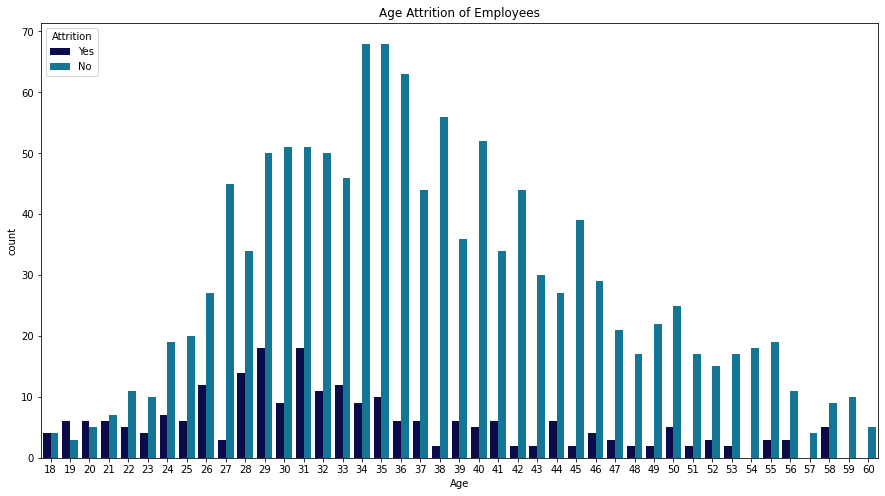

In [7]:
# Age attrition of employees
plt.figure(figsize=(15,8))
sns.countplot(data=df,x=df['Age'],hue=(df['Attrition']),palette='ocean')
plt.title('Age Attrition of Employees')

Text(0.5, 1.0, 'Departmental Attrition of Employees')

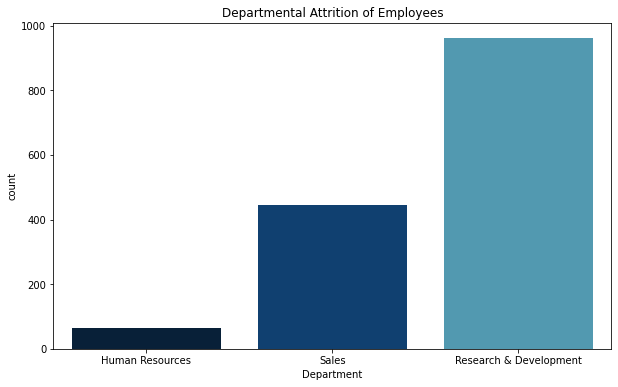

In [8]:
# Departmental Attrition of Employees
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['Department'],order=df['Department'].value_counts().sort_values(ascending=True).index,palette='ocean')
plt.title('Departmental Attrition of Employees')

Text(0.5, 1.0, 'Attrition for left Employees')

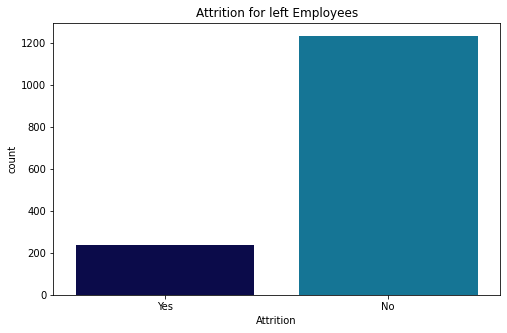

In [9]:
# Attrition for left Employees
plt.figure(figsize=(8,5))
sns.countplot(data=df,x=df['Attrition'],order=df['Attrition'].value_counts().sort_values(ascending=True).index,palette = 'ocean').set_title('Attrition for left Employees')

Text(0.5, 1.0, 'Attrition by EducationField')

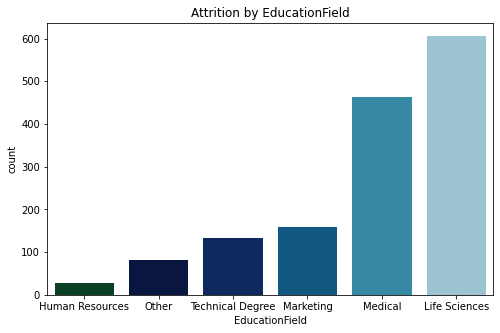

In [10]:
# distribution of employees by the education field
plt.figure(figsize=(8,5))
sns.countplot(data=df,x=df['EducationField'],order=df['EducationField'].value_counts().sort_values(ascending=True).index,palette = 'ocean').set_title('Attrition by EducationField')

Text(0.5, 1.0, 'MaritalStatus')

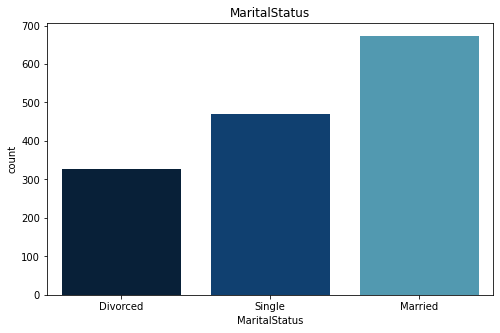

In [11]:
# number of married and unmarried employees
plt.figure(figsize=(8,5))
sns.countplot(data=df,x=df['MaritalStatus'],order=df['MaritalStatus'].value_counts().sort_values(ascending=True).index,palette = 'ocean').set_title('MaritalStatus')

In [12]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [13]:
df['Attrition'].replace('Yes', 1, inplace=True)
df['Attrition'].replace('No', 0, inplace=True)

In [14]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [15]:
df['Department'].replace('Human Resources', 1, inplace=True)
df['Department'].replace('Research & Development', 2, inplace=True)
df['Department'].replace('Sales', 3, inplace=True)

In [16]:
df['Department'].value_counts()

2    961
3    446
1     63
Name: Department, dtype: int64

In [17]:
df['EducationField'].replace('Human Resources', 1, inplace=True)
df['EducationField'].replace('Life Sciences', 2, inplace=True)
df['EducationField'].replace('Marketing', 3, inplace=True)
df['EducationField'].replace('Medical', 4, inplace=True)
df['EducationField'].replace('Other', 5, inplace=True)
df['EducationField'].replace('Technical Degree', 6, inplace=True)

In [18]:
df['EducationField'].value_counts()

2    606
4    464
3    159
6    132
5     82
1     27
Name: EducationField, dtype: int64

In [19]:
df['MaritalStatus'].replace('Divorced', 1, inplace=True)
df['MaritalStatus'].replace('Married', 2, inplace=True)
df['MaritalStatus'].replace('Single', 3, inplace=True)

In [20]:
df['MaritalStatus'].value_counts()

2    673
3    470
1    327
Name: MaritalStatus, dtype: int64

In [21]:
# Model Building
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=200)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(x_test)

In [25]:
lr_score = print(lr.score(x_train,y_train).round(2)*100,'%')

84.0 %


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
print("Model accuracy:", accuracy_score(y_test, y_pred).round(2)*100,'%')

Model accuracy: 87.0 %


In [28]:
print("Classification report", classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

           0       0.87      0.99      0.93       253
           1       0.67      0.10      0.17        41

    accuracy                           0.87       294
   macro avg       0.77      0.54      0.55       294
weighted avg       0.84      0.87      0.82       294



In [29]:
print(confusion_matrix(y_test, y_pred))

[[251   2]
 [ 37   4]]
